<a href="https://colab.research.google.com/github/nishithkotak/machine-learning/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive #toimport google drive data

In [3]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive"

/content/drive/My Drive


In [6]:
df1 = pd.read_excel('Colab Notebooks/kmean.xlsx', sheet_name='ex7data2_X', header=None)
df1.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [7]:
X = np.array(df1)


In [8]:
import random
init_centroids = random.sample(range(0, len(df1)), 3)
init_centroids

[58, 180, 165]

In [9]:
centroids = []
for i in init_centroids:
    centroids.append(df1.loc[i])
centroids

[0    2.241851
 1    4.924462
 Name: 58, dtype: float64, 0    3.124051
 1    0.678218
 Name: 180, dtype: float64, 0    2.115994
 1    0.793037
 Name: 165, dtype: float64]

In [10]:
centroids = np.array(centroids)


In [11]:
centroids

array([[2.24185052, 4.9244617 ],
       [3.12405123, 0.67821757],
       [2.1159935 , 0.7930365 ]])

In [12]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [13]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [ ]:
get_centroids = findClosestCentroids(centroids, X)
get_centroids

In [15]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [17]:
#get_centroids = findClosestCentroids(centroids, X)


In [20]:
#new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(get_centroids, columns=['cluster'])],axis=1)

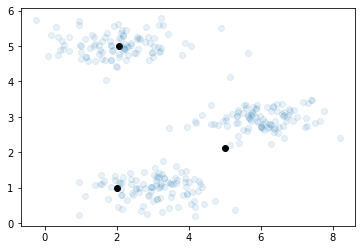

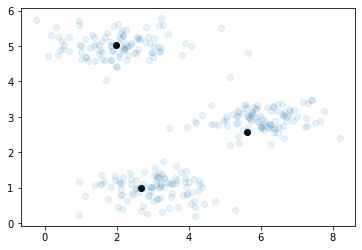

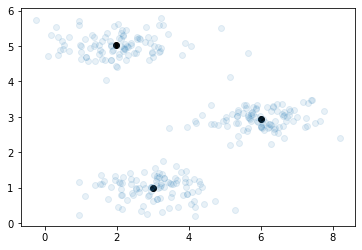

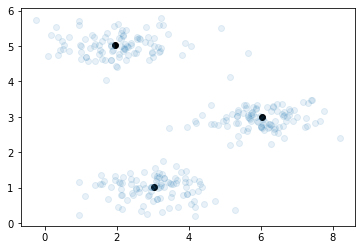

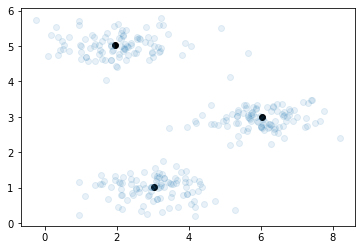

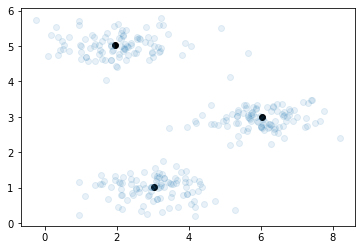

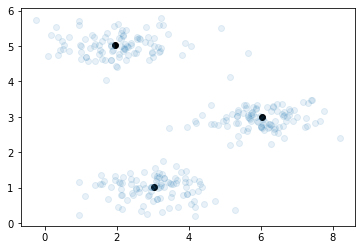

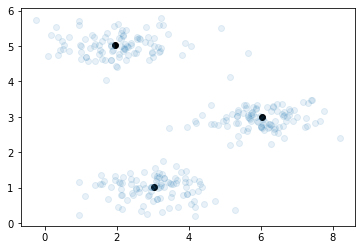

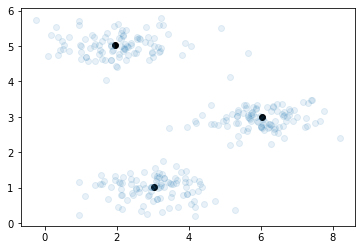

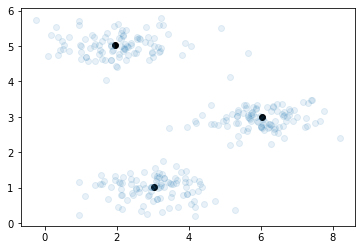

In [22]:
for i in range(10):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()

In [23]:
#Dimensionality Reduction

In [ ]:
import cv2
im = cv2.imread('Colab Notebooks/tom.jpg')
im

In [29]:
im.shape

(200, 200, 3)

In [31]:
im = (im/255).reshape(200*200, 3)

In [32]:
random_index = random.sample(range(0, len(im)), 10)

In [33]:
random_index

[19486, 2784, 20759, 1263, 27277, 19536, 4266, 23444, 13423, 5564]

In [34]:
centroids = []
for i in random_index:
    centroids.append(im[i])
centroids = np.array(centroids)

In [35]:
im = np.array(im)


In [36]:
for i in range(20):
    get_centroids = findClosestCentroids(centroids, im)
    centroids = calc_centroids(get_centroids, im)

In [37]:
im_recovered = im.copy()
for i in range(len(im)):
    im_recovered[i] = centroids[get_centroids[i]]

In [38]:
im_recovered = im_recovered.reshape(200,200, 3)


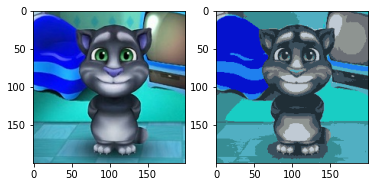

In [39]:
im1 = cv2.imread('Colab Notebooks/tom.jpg')
import matplotlib.image as mpimg
fig,ax = plt.subplots(1,2)
ax[0].imshow(im1)
ax[1].imshow(im_recovered)